In [1]:
## Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('Crimes_-_2001_to_present.csv')
census = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')


/Users/nbhadra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [4]:
census.head(4)


,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0


In [5]:
df.columns


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df.shape

(7230540, 22)

In [7]:

## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [8]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

THEFT                                1525807
BATTERY                              1324657
CRIMINAL DAMAGE                       823538
NARCOTICS                             734764
ASSAULT                               457745
OTHER OFFENSE                         448657
BURGLARY                              406980
MOTOR VEHICLE THEFT                   332906
DECEPTIVE PRACTICE                    299747
ROBBERY                               271699
CRIMINAL TRESPASS                     204785
WEAPONS VIOLATION                      84898
PROSTITUTION                           69364
PUBLIC PEACE VIOLATION                 50692
OFFENSE INVOLVING CHILDREN             50074
CRIM SEXUAL ASSAULT                    28073
SEX OFFENSE                            27597
INTERFERENCE WITH PUBLIC OFFICER       17438
GAMBLING                               14593
LIQUOR LAW VIOLATION                   14449
ARSON                                  12089
HOMICIDE                               10742
KIDNAPPING

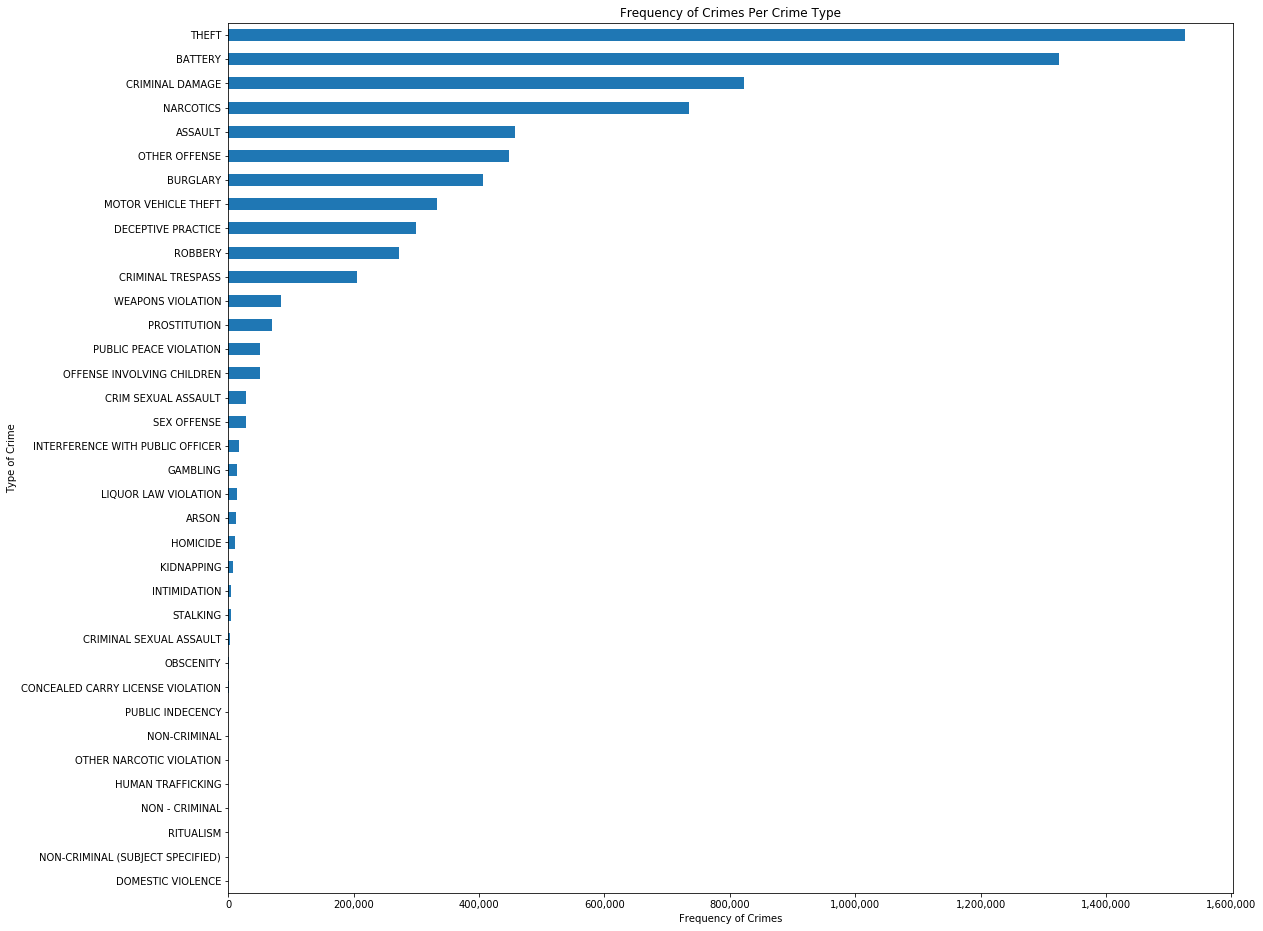

In [9]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


In [10]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2002    486764
2001    485783
2003    475962
2004    469398
2005    453739
2006    448139
2007    437044
2008    427102
2009    392773
2010    370401
2011    351879
2012    336144
2013    307308
2014    275559
2016    269471
2017    268690
2018    268240
2015    264457
2019    260408
2020    181279
Name: Year, dtype: int64

In [11]:
df.isnull().sum()##checking missing value

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      7560
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614833
Community Area          613484
FBI Code                     0
X Coordinate             86061
Y Coordinate             86061
Year                         0
Updated On                   0
Latitude                 86061
Longitude                86061
Location                 86061
dtype: int64

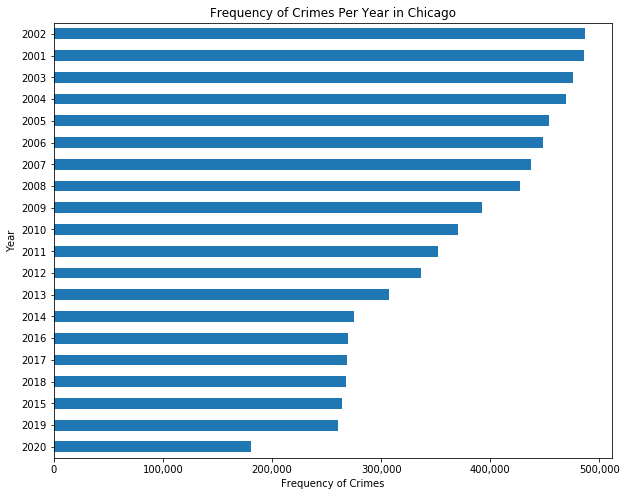

In [12]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)
## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [13]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

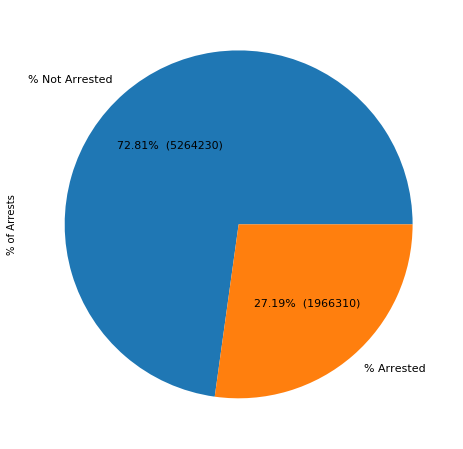

In [14]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))

In [15]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343872,70.787162
2001,True,141911,29.212838
2002,False,345209,70.919172
2002,True,141555,29.080828
2003,False,334385,70.254558
2003,True,141577,29.745442
2004,False,324708,69.175412
2004,True,144690,30.824588
2005,False,312837,68.946465


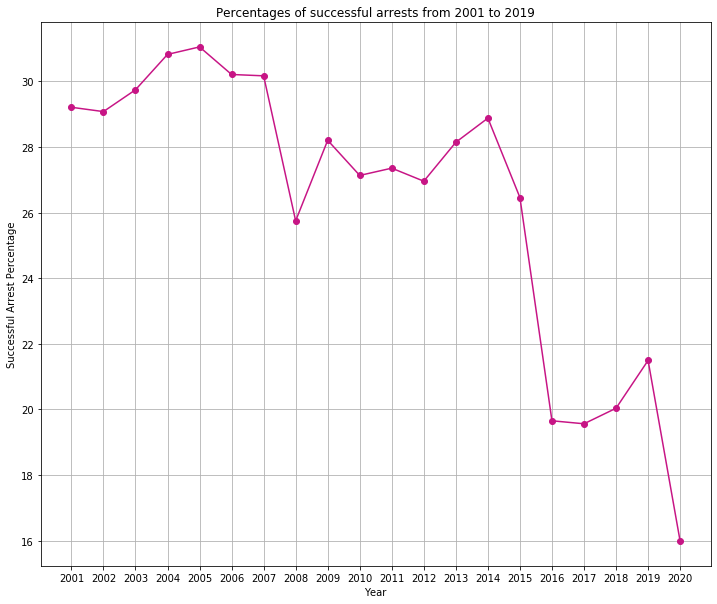

In [16]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2019')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')

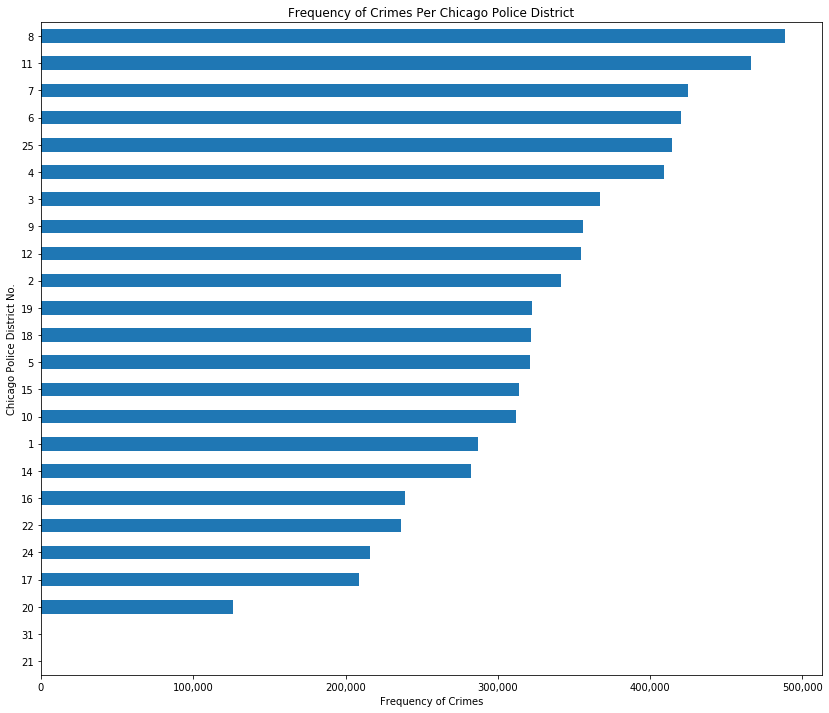

In [17]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [18]:
df['Primary Type'] = df['Primary Type'].replace(
    {'MOTOR VEHICLE THEFT': 'THEFT', 'ROBBERY': 'THEFT'})
df["Primary Type"].value_counts()

THEFT                                2130412
BATTERY                              1324657
CRIMINAL DAMAGE                       823538
NARCOTICS                             734764
ASSAULT                               457745
OTHER OFFENSE                         448657
BURGLARY                              406980
DECEPTIVE PRACTICE                    299747
CRIMINAL TRESPASS                     204785
WEAPONS VIOLATION                      84898
PROSTITUTION                           69364
PUBLIC PEACE VIOLATION                 50692
OFFENSE INVOLVING CHILDREN             50074
CRIM SEXUAL ASSAULT                    28073
SEX OFFENSE                            27597
INTERFERENCE WITH PUBLIC OFFICER       17438
GAMBLING                               14593
LIQUOR LAW VIOLATION                   14449
ARSON                                  12089
HOMICIDE                               10742
KIDNAPPING                              6969
INTIMIDATION                            4270
STALKING  

In [19]:
census = census.rename(columns={"Community Area Number":"Community Area"})
census.head()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [20]:
crime_08 = df.loc[df["Year"]==2008]
crime_09 = df.loc[df["Year"]==2009]
crime_10 = df.loc[df["Year"]==2010]
crime_11 = df.loc[df["Year"]==2011]
crime_12 = df.loc[df["Year"]==2012]


In [21]:
crime_data=pd.merge(crime_08,census,on="Community Area")
crime_data1=pd.merge(crime_09,census,on="Community Area")
crime_data2=pd.merge(crime_10,census,on="Community Area")
crime_data3=pd.merge(crime_11,census,on="Community Area")
crime_data4=pd.merge(crime_12,census,on="Community Area")

In [22]:

crime2=pd.concat([crime_data, crime_data1,crime_data2,crime_data3,crime_data4])
crime2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [23]:

theft=crime2.loc[crime2["Primary Type"]=="THEFT"]
theft

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
16,6397756,HP482236,07/26/2008 08:00:00 AM,013XX S SAWYER AVE,0810,THEFT,OVER $500,STREET,False,False,...,NaN,NaN,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0
25,7034059,HR440828,05/23/2008 09:00:00 AM,013XX S KARLOV AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,NaN,NaN,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0
26,7380428,HS181682,01/01/2008 12:01:00 AM,019XX S TROY ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,NaN,NaN,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0
27,7443529,HS245392,04/15/2008 12:00:00 PM,037XX W CERMAK RD,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,NaN,NaN,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0
29,7806430,HS616940,02/01/2008 09:00:00 AM,013XX S INDEPENDENCE BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,NaN,NaN,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336136,9147735,HW293635,06/19/2012 12:00:00 PM,034XX S BELL AVE,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,...,-87.681418,"(41.831516566, -87.681417962)",McKinley Park,7.2,18.7,13.4,32.9,35.6,16954,61.0
336137,9182416,HW327290,06/20/2012 12:00:00 PM,034XX S BELL AVE,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,...,-87.681418,"(41.831516566, -87.681417962)",McKinley Park,7.2,18.7,13.4,32.9,35.6,16954,61.0
336138,9262788,HW407362,11/30/2012 01:15:00 PM,019XX W 33RD ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,DEPARTMENT STORE,True,False,...,-87.674369,"(41.834042232, -87.674368991)",McKinley Park,7.2,18.7,13.4,32.9,35.6,16954,61.0
336139,9367342,HW510525,10/09/2012 12:01:00 AM,035XX S WINCHESTER AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,-87.674040,"(41.829594631, -87.674040349)",McKinley Park,7.2,18.7,13.4,32.9,35.6,16954,61.0


In [24]:
no_theft = crime2.loc[crime2["Primary Type"]!="THEFT"]


In [25]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].max()


54.8

In [26]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].min()


2.5

In [27]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%"]

theft["High School Graduate Percentage"] = pd.cut(theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"], bins, labels=group_names)
a=theft["High School Graduate Percentage"].value_counts()/1000

a1=pd.DataFrame(a.sort_index())
a1

/Users/nbhadra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,High School Graduate Percentage
0-5%,99.360
5-10%,33.626
10-15%,118.203
15-20%,83.236
20-25%,78.196
25-30%,51.725
30-35%,30.704
35-40%,29.352
40-45%,17.390
45-50%,5.033


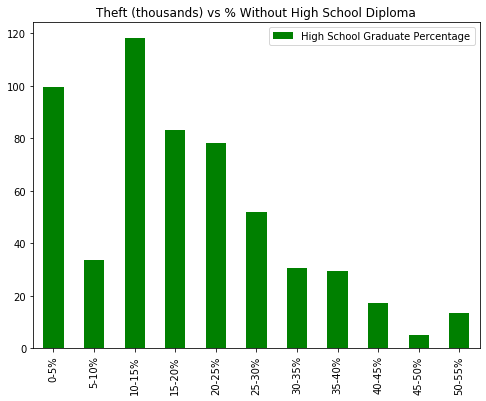

In [28]:
a1.plot(kind="bar", figsize=(20,3),color='g')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs % Without High School Diploma")
plt.show()

In [29]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%"]

theft["Unemployment %"] = pd.cut(theft["PERCENT AGED 16+ UNEMPLOYED"], bins, labels=group_names)
b=theft["Unemployment %"].value_counts()/1000

b1=pd.DataFrame(b.sort_index())
b1

/Users/nbhadra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unemployment %
0-5%,22.524
5-10%,194.915
10-15%,74.250
15-20%,106.817
20-25%,108.321
25-30%,37.502
30-35%,3.173
35-40%,12.964


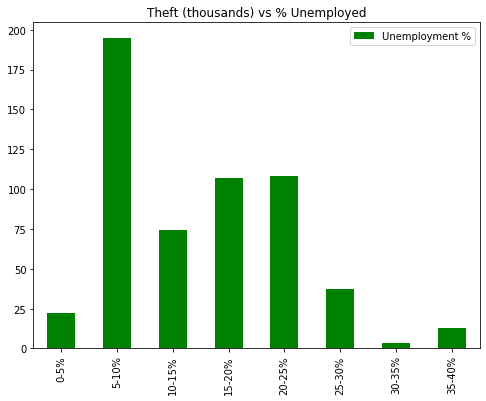

In [30]:
b1.plot(kind="bar", figsize=(20,3),color='g')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs % Unemployed")
plt.show()

In [31]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55,60]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%"]

theft["% Houses Under Poverty"] = pd.cut(theft["PERCENT HOUSEHOLDS BELOW POVERTY"], bins, labels=group_names)
c=theft["% Houses Under Poverty"].value_counts()
c_df = pd.DataFrame(c)

c_df["relative"]=c_df["% Houses Under Poverty"]/1000
c1=pd.DataFrame(c_df["relative"].sort_index())
c1

/Users/nbhadra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,relative
0-5%,1.667
5-10%,18.326
10-15%,159.887
15-20%,96.149
20-25%,57.112
25-30%,120.416
30-35%,57.453
35-40%,1.075
40-45%,33.246
45-50%,11.962


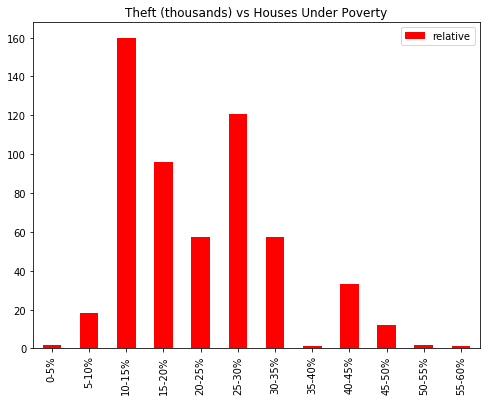

In [32]:
c1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs Houses Under Poverty")
plt.show()

In [33]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 4,8,12,16]

# Create the names for the four bins
group_names = ["0-4%", "4-8%", "8-12%", "12-16%", ]

theft["% Crowded Housing"] = pd.cut(theft["PERCENT OF HOUSING CROWDED"], bins, labels=group_names)
d=theft["% Crowded Housing"].value_counts()/1000

d1 = pd.DataFrame(d)
d1

/Users/nbhadra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,% Crowded Housing
0-4%,332.294
4-8%,144.310
8-12%,51.899
12-16%,31.963


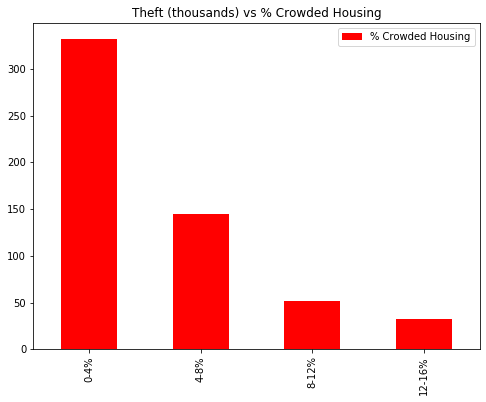

In [34]:
d1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs % Crowded Housing")
plt.show()

In [35]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10000,20000,30000,40000,50000,60000,70000,80000,90000]

# Create the names for the four bins
group_names = ["0-10,000", "10,000-20,000", "20,000-30,000", "30,000-40,000","40,000-50,000","50,000-60,000","60,000-70,000","70,000-80,000","80,000-90,000" ]

theft["Per Capita Income Bracket"] = pd.cut(theft["PER CAPITA INCOME "], bins, labels=group_names)
e=theft["Per Capita Income Bracket"].value_counts()/1000
e1=pd.DataFrame(e.sort_index())
e1

/Users/nbhadra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Per Capita Income Bracket
"0-10,000",1.273
"10,000-20,000",273.767
"20,000-30,000",94.127
"30,000-40,000",49.531
"40,000-50,000",47.298
"50,000-60,000",8.994
"60,000-70,000",40.758
"70,000-80,000",15.522
"80,000-90,000",29.196


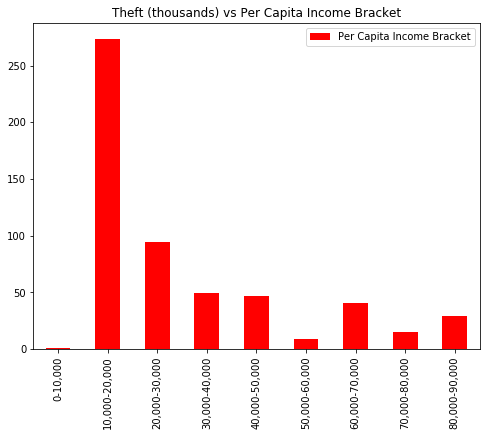

In [36]:
e1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs Per Capita Income Bracket")
plt.show()

In [37]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10,20,30,40,50,60,70,80,90,100]

# Create the names for the four bins
group_names = ["0-10", "10-20", "20-30", "30-40","40-50","50-60","60-70","70-80","80-90","90-100" ]

crime2["Hardship Bracket"] = pd.cut(crime2['HARDSHIP INDEX'], bins, labels=group_names)
f=crime2["Hardship Bracket"].value_counts()/1000
f1=pd.DataFrame(f.sort_index())
f1

,Hardship Bracket
0-10,247.948
10-20,132.709
20-30,111.694
30-40,123.620
40-50,111.384
50-60,250.169
60-70,160.940
70-80,299.775
80-90,250.624
90-100,188.556


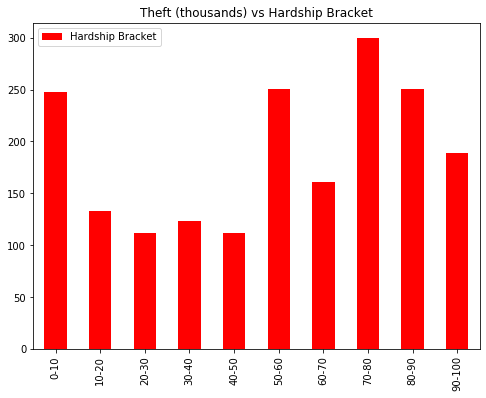

In [38]:
f1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
figure = plt.gcf() 
figure.set_size_inches(8, 6)
plt.title("Theft (thousands) vs Hardship Bracket")
plt.show()

In [ ]:
merged_df = pd.merge(df,census,on="Community Area")
merged_df.head()

In [ ]:

crime_by_area=crime2.groupby("Community Area")
crime_count = crime_by_area.count()
#crime_count["ID"]

In [ ]:
theft_by_area = theft.groupby("Community Area")
theft_count = theft_by_area.count()
#theft_count["ID"]

In [ ]:
no_theft_by_area = no_theft.groupby("Community Area")
no_theft_count = no_theft_by_area.count()
#no_theft_count

In [ ]:
#t-test
a=stats.ttest_1samp(theft_count["ID"]/1000, no_theft_count["ID"]/1000)
a

In [ ]:
x_axis = theft_count["ID"]/1000
fake = no_theft_count["ID"]/1000
(slope, intercept, _, _, _) = linregress(x_axis, fake)
fit = slope * x_axis + intercept

In [ ]:
fig, ax = plt.subplots()





ax.set_xlabel("Number of Thefts per Area (thousands)")
ax.set_ylabel("Number of Crimes per Area (thousands)")

ax.plot(x_axis, fake, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()
